In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib.widgets import Cursor, Button
import pandas as pd
import mplcursors
%matplotlib inline
style.use('ggplot')

import cv2, os, numpy as np


In [2]:
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
    ('double' if event.dblclick else 'single', event.button,event.x, event.y, event.xdata, event.ydata))

In [3]:
os.chdir(r"E:\THESIS\IMAGES")

In [4]:
a = r"E:\THESIS\ADNI_data\ADNI1_Annual_2_Yr_3T_306_WORK\IMAGES\AD\AD-data1\AD-1_img73.jpg"
b = r"E:\THESIS\ADNI_data\ADNI1_Annual_2_Yr_3T_306_WORK\IMAGES\AD\AD-data1\AD-1_img89.jpg"
a = cv2.imread(a,0)
b = cv2.imread(b,0)

In [5]:
cv2.imshow('x',a)

In [2]:
import matplotlib.image as mpimg
from skimage import io

In [13]:
def display(s_img, m_img):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].plot(s_img)
    axs[1].plot(m_img)
    plt.show()
    return

In [12]:
def calc_CLAHE(s_img):
    img = cv2.cvtColor(s_img, cv2.COLOR_GRAY2BGR)
    print('GRAY2BGR',end='->')
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    print('BGR2LAB',end='->')
    l, a, b = cv2.split(lab_img)

    CLAHE = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    CLAHE_img = CLAHE.apply(l)
    updated_lab_img = cv2.merge((CLAHE_img, a, b))
    CLAHE_img_bgr = cv2.cvtColor(updated_lab_img, cv2.COLOR_LAB2BGR)
    print('LAB2BGR CLAHE',end='->')
    CLAHE_npy = cv2.cvtColor(CLAHE_img_bgr, cv2.COLOR_BGR2GRAY)
    print('BGR2GRAY CLAHE')
    return CLAHE_npy


GRAY2BGR->BGR2LAB->LAB2BGR CLAHE->BGR2GRAY CLAHE


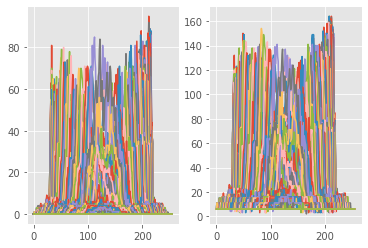

In [20]:
img1 = cv2.imread(r"E:\THESIS\IMAGES\MCI_23_img101.jpg")
cv2.imshow('x',img1)
img2 = cv2.imread(r"E:\THESIS\IMAGES\MCI_71_img101.jpg",0)

#plt.hist(img1.ravel(),256,[0,256]); plt.show()

y = calc_CLAHE(img1)
#cv2.imshow('x', y)

In [ ]:
fig, axs = plt.subplot(nrows=2, ncols=2)
